# Notes: 
used data set : **Medical Appointment No Shows**

### Analysis:
-  how many people no show ?
-  what is the highest Neighbourhood in no show ?
-  what is the highest Neighbourhood in attendance ?
-  does Neighbourhood with high no show number have high attendance number too ?
-  what is the highest neighborhoods in no show by percentage 
-  what attributes may make the patient no show ?

description:
- calculated the number of no shows, shows and percentage of no show and used matplotlib barplot to visualize this question
- visualized using seaborn barplot
- visualized using seaborn barplot
- visualized using scatterplot
- visualized using seaborn barplot
- used matplotlib barplot to visualize 


### Problems in the data:
-  PatientId and AppointmentID should be string
-  ScheduledDay and AppointmentDay should be a date object
-  No-show column should be int not string



# Project: Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('KaggleV2-May-2016.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**we can see that `No-show` column should be boolean not string**

In [4]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**`ScheduledDay` and `AppointmentDay` should be date not string**

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Problems in the data:
- PatientId and AppointmentID should be string 
- ScheduledDay and AppointmentDay should be a date object
- No-show column should be int not string

## Analysis:
-  how many people no show ?
-  what is the highest Neighbourhood in no show ?
-  what attributes may make the patient no show ?


### Data Cleaning
## Problems in the data:
- PatientId and AppointmentID should be string 
- ScheduledDay and AppointmentDay should be a date object
- No-show column should be int not string


**PatientId and AppointmentID should be string**

In [7]:
df['PatientId'] = df['PatientId'].apply(int).astype(str)
df['AppointmentID'] = df['AppointmentID'].astype(str)

**ScheduledDay and AppointmentDay should be a date object**

In [8]:
df['ScheduledDay'] = pd.DatetimeIndex(df['ScheduledDay'])
df['AppointmentDay'] = pd.DatetimeIndex(df['AppointmentDay'])

**No-show column should be int not string**

In [9]:
temp = {'Yes': 1, 'No': 0}
df['No-show'] = df['No-show'].map(temp)

In [10]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  object             
 1   AppointmentID   110527 non-null  object             
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

<a id='eda'></a>
## Exploratory Data Analysis

## Analysis:
-  how many people no show ?
-  what is the highest Neighbourhood in no show ?
-  what is the highest Neighbourhood in attendance ?
-  does Neighbourhood with high no show number have high attendance number too ?
-  what is the highest neighborhoods in no show by percentage 
-  what attributes may make the patient no show ?


### how many people no show ?

In [12]:
total = df['No-show'].count()
no_show = df[df['No-show'] == 1]['No-show'].count()

In [13]:
percentage = round(no_show/total *100,1)
print('percentage: ',percentage)
print("no show: ",no_show)
print("total: ",total)

percentage:  20.2
no show:  22319
total:  110527


**there is 22319 out of 110527 (20.2%) no show**

**Now let's barplot the number of absent against attended patients<br>
we can use this to optimize the revenue prediction**

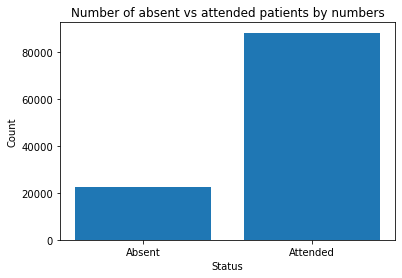

In [14]:
plt.bar(['Absent','Attended'],[no_show,total-no_show])
plt.title('Number of absent vs attended patients by numbers')
plt.xlabel('Status')
plt.ylabel('Count');

**we should plot it using the percentage too to avoid large numbers in y axis**

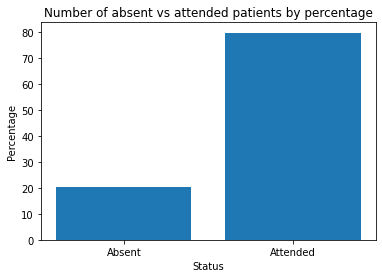

In [15]:
plt.bar(['Absent','Attended'],[percentage,100-percentage])
plt.title('Number of absent vs attended patients by percentage')
plt.xlabel('Status')
plt.ylabel('Percentage');

**the percentage of no show is 20.2<br>
It will affect sales at a percentage close to it**

### what is the highest Neighbourhood in no show ?

**it's important to know the highest neighbourhood in no shows to avoid neighbourhood with high no shows**

In [16]:
no_show = df.groupby('Neighbourhood').sum()['No-show'] 
total = df.groupby('Neighbourhood').count()['No-show'] 
show =  total - no_show 

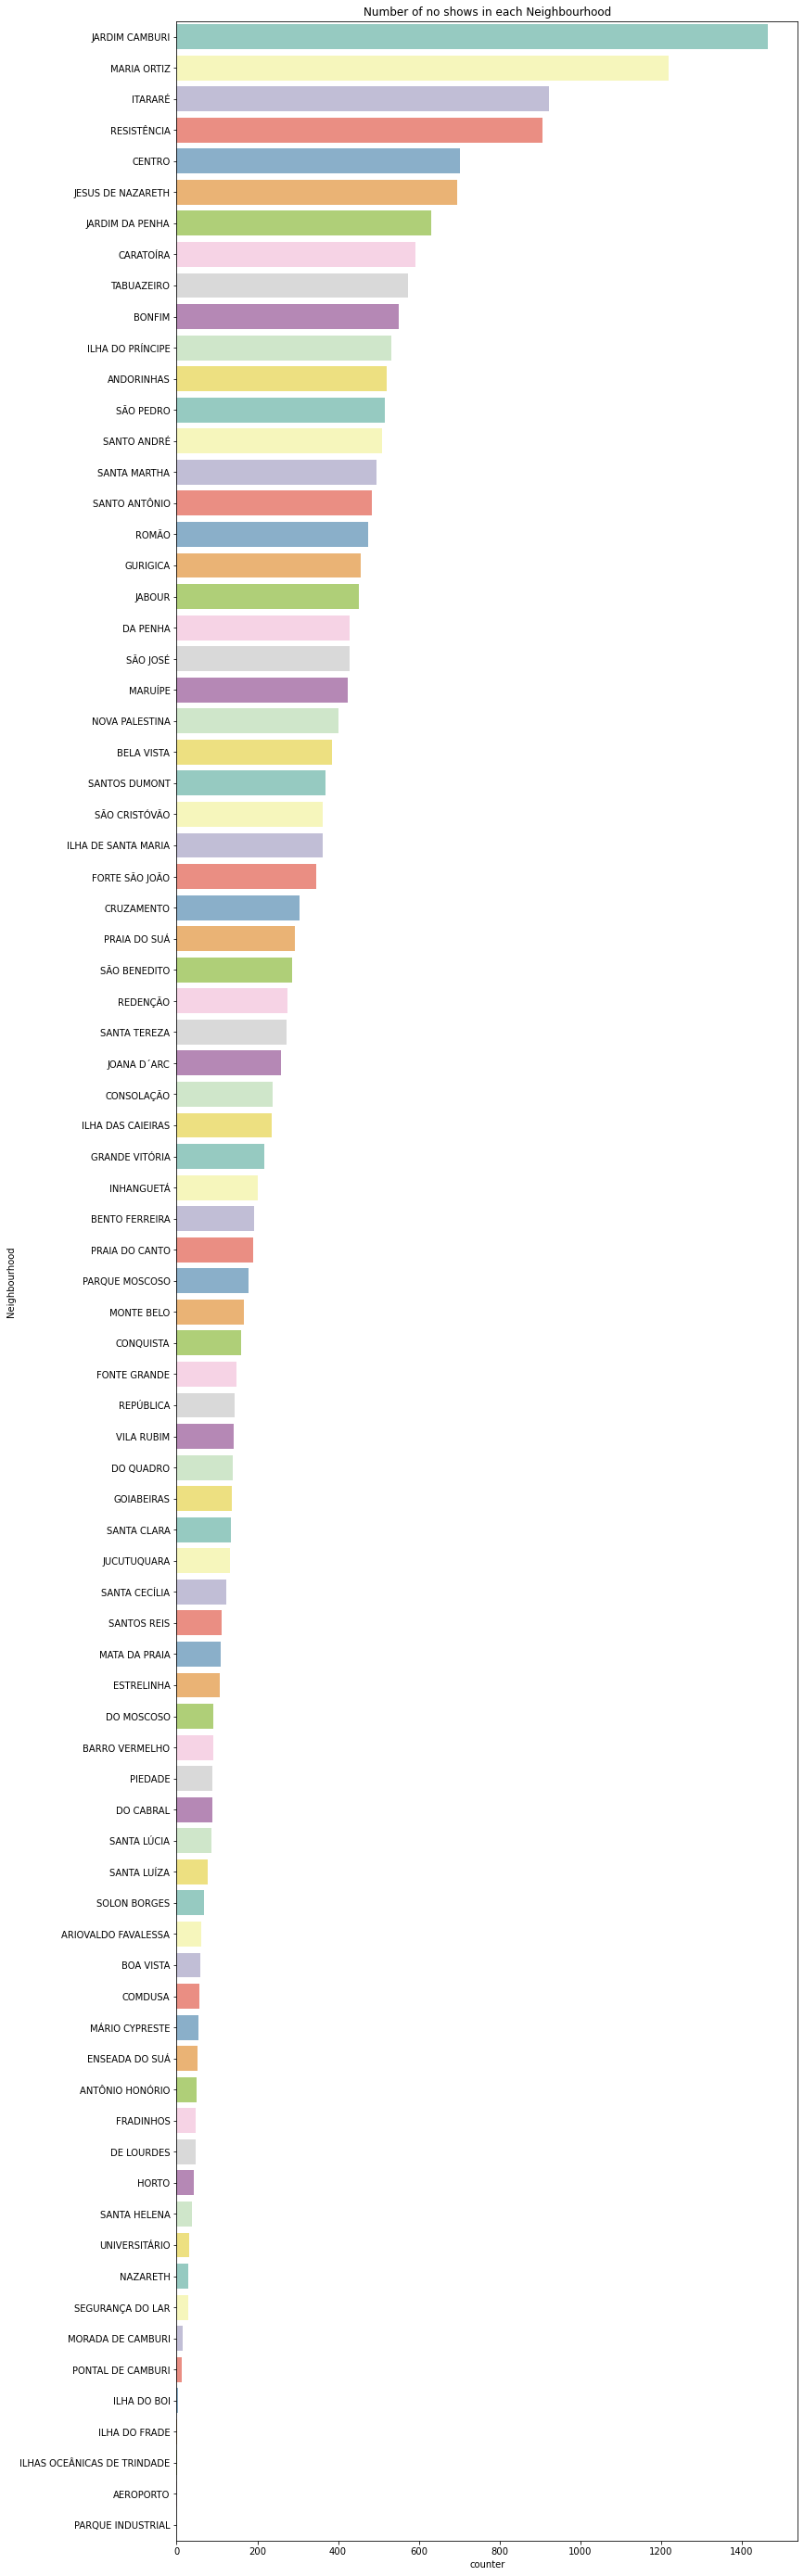

In [17]:
plt.subplots(figsize=(12, 50))
temp = pd.DataFrame({'Neighbourhood':no_show.index,'counter':no_show.values})
ordered = temp.sort_values('counter',ascending = False)
sns.barplot(x ='counter', y='Neighbourhood', data=ordered, palette="Set3")

plt.title('Number of no shows in each Neighbourhood')
plt.show()

### what is the highest Neighbourhood in attendance ?

**it's important to know the number of shows to know how much will the hospital earn**

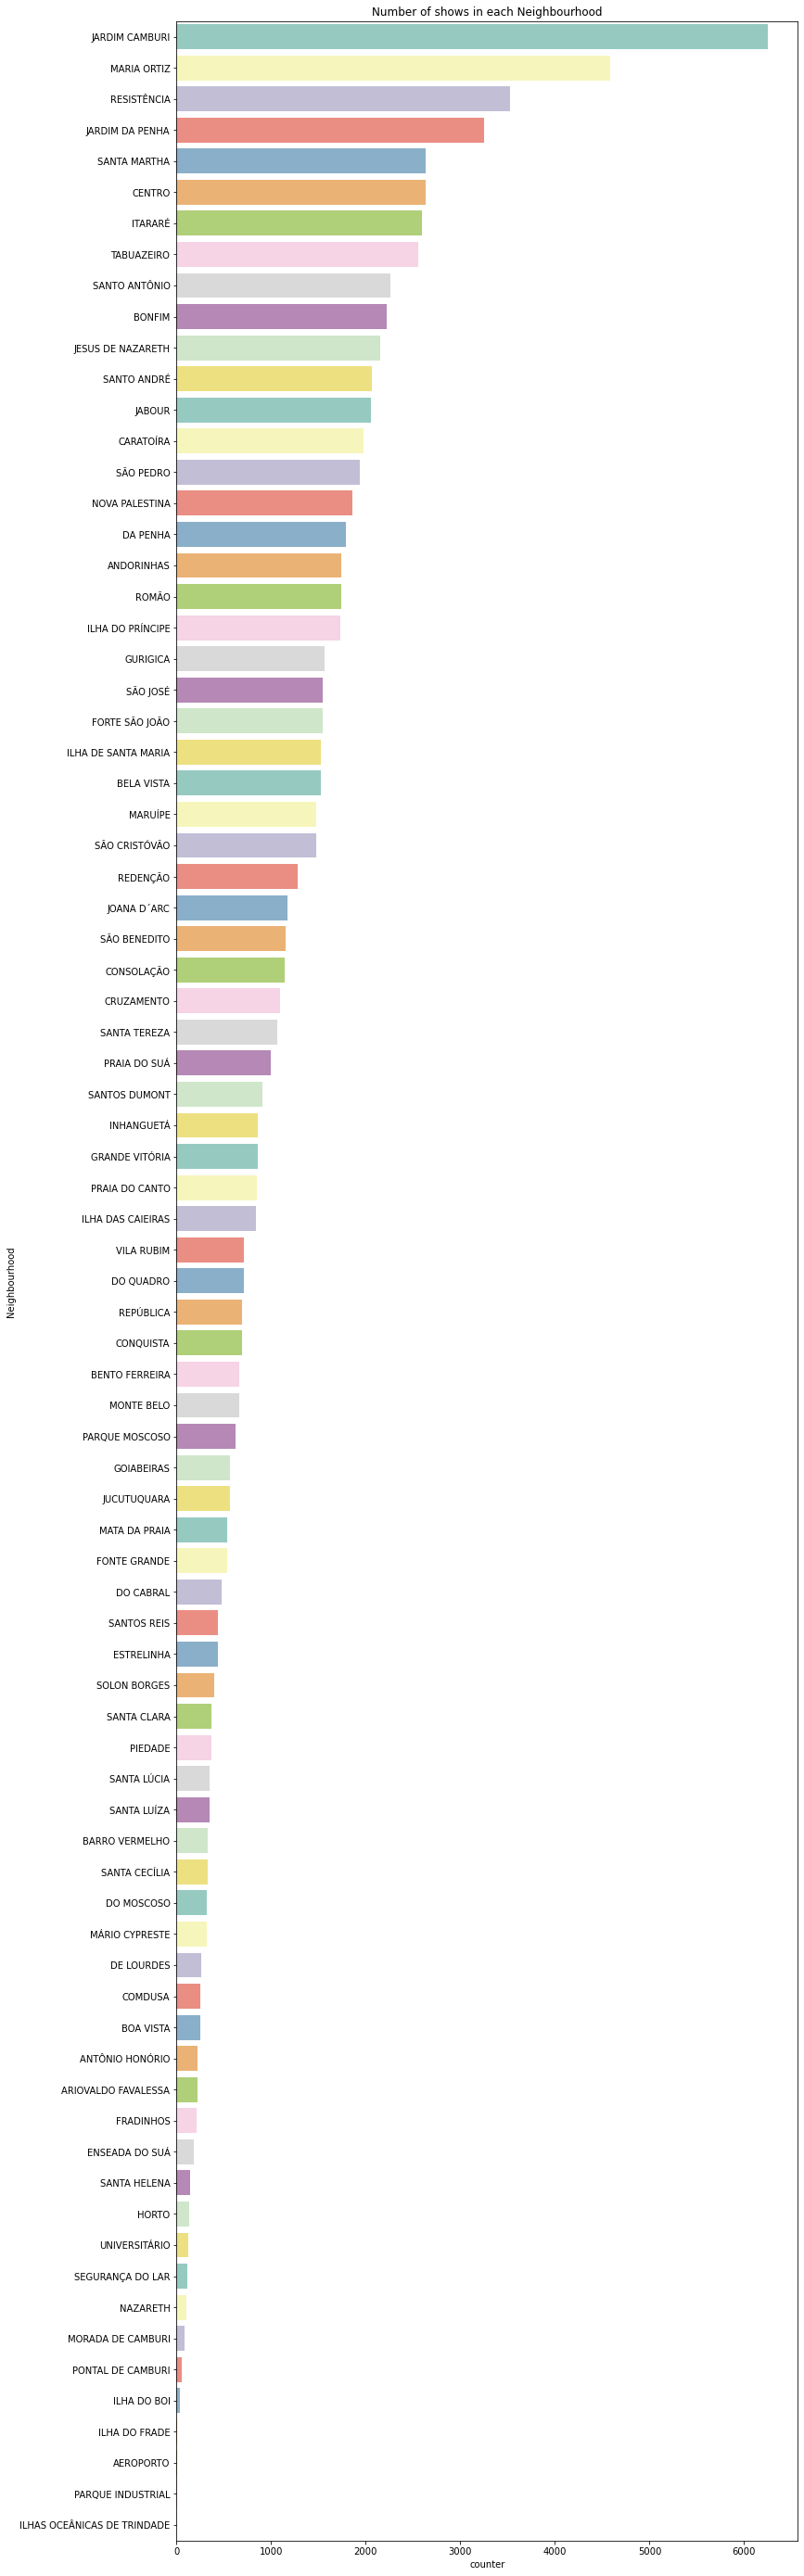

In [18]:
plt.subplots(figsize=(12, 50))
temp = pd.DataFrame({'Neighbourhood':show.index,'counter':show.values})
sns.barplot(x ='counter', y='Neighbourhood', data=temp, palette="Set3",
           order = temp.sort_values('counter',ascending = False).Neighbourhood)
plt.title('Number of shows in each Neighbourhood')
plt.show()

### does Neighbourhood with high no show number have high attendance number too ?

**we should make sure that high no show percentage indicate a low show percentage**

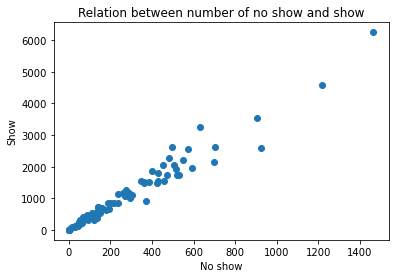

In [19]:
plt.scatter(x = no_show.values, y = show.values)
plt.title('Relation between number of no show and show')
plt.xlabel('No show')
plt.ylabel('Show');

**we can see that Neighborhoods that have a large number of no show also have a large number of attendance (positive correaltion)**

**let's see the highest neighborhoods in no show by percentage**

In [20]:
percentage = no_show / total

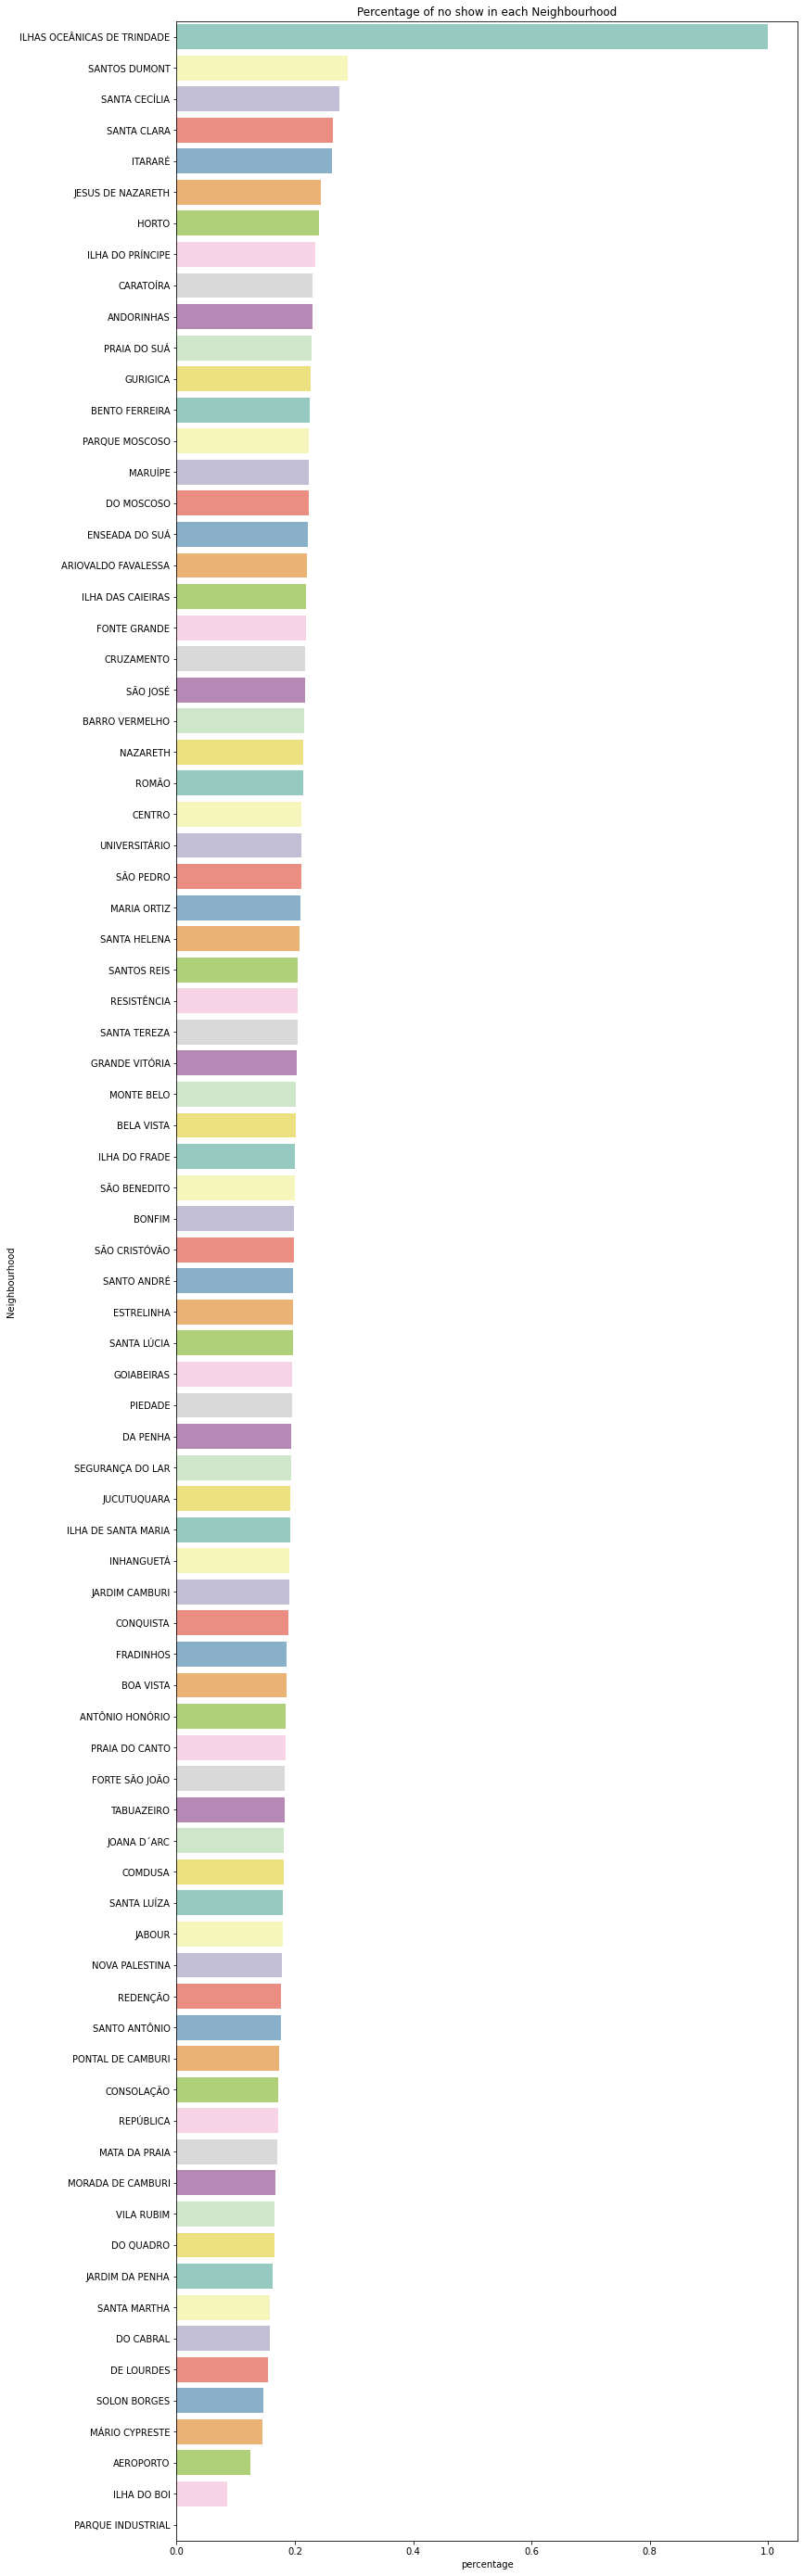

In [21]:
plt.subplots(figsize=(12, 50))
temp = pd.DataFrame({'Neighbourhood':percentage.index,'percentage':percentage.values})
sns.barplot(x ='percentage', y='Neighbourhood', data=temp, palette="Set3",
           order = temp.sort_values('percentage',ascending = False).Neighbourhood)
plt.title('Percentage of no show in each Neighbourhood')
plt.show()

In [22]:
print(temp[temp['Neighbourhood'] == 'ILHAS OCEÂNICAS DE TRINDADE'])

                  Neighbourhood  percentage
34  ILHAS OCEÂNICAS DE TRINDADE         1.0


**the highest Neighbourhood in no show is `ILHAS OCEÂNICAS DE TRINDADE` so we should avoid neighbourhood with large no show percentage** <br>
>note : looks like something is wrong in the data about this Neighbourhood because all patients missed the appointment 

### what attributes may make the patient no show?

**we need to know which attributes may make the patients no show or show**

**let's use barplot to do this**<br>
>in the next visualiztion we will  plot the true values against the false values by percentage to visualize the no shows percentage in each

In [23]:
def plot_by_percentage(df, column):
    """
    used to barplot a boolean column
    will plot the true values against the false values by percentage
    to visualize the no shows percentage in each
    input:
        df : the data frame
        column: column name in this dataframe
    output:
        display the barplot
    """
    attribute = df[df[column] == 1]['No-show']
    non_attribute = df[df[column] == 0]['No-show']
    
    attribute_percentage = attribute[attribute == 1].count() / attribute.count()
    non_attribute_percentage = non_attribute[non_attribute == 1].count() / non_attribute.count()
    
    print('{} percentage: {}'.format(column, attribute_percentage))
    print('non {} percentage: {}'.format(column, non_attribute_percentage))
    
    plt.bar(['{}'.format(column), 'non {}'.format(column)],
            [attribute_percentage, non_attribute_percentage])
    plt.title("percentage of {} vs non {} in no shows".format(column,column))
    plt.xlabel("Status")
    plt.ylabel("Percentage");

**let's start with scholarship**

Scholarship percentage: 0.2373630420771568
non Scholarship percentage: 0.19807155900708365


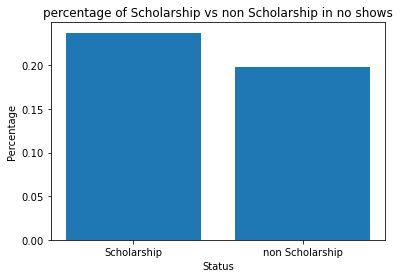

In [24]:
plot_by_percentage(df,"Scholarship")

**as we see patients who have a scholarship tends to no show this may fill many hours with appointments**

**what about Hipertension ?**

Hipertension percentage: 0.17301958625751113
non Hipertension percentage: 0.20903680995424115


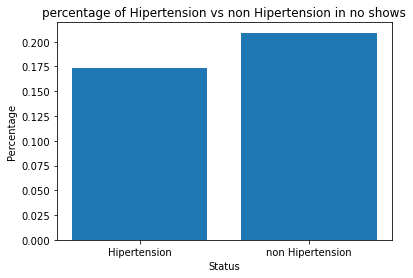

In [25]:
plot_by_percentage(df,"Hipertension")

**people with hipertension tends to attend the appointment we can't know why because we don't have enough data but maybe because their illness is serious**

**does patients with Diabetes tends to show ?**

Diabetes percentage: 0.18003273322422259
non Diabetes percentage: 0.20362824612025268


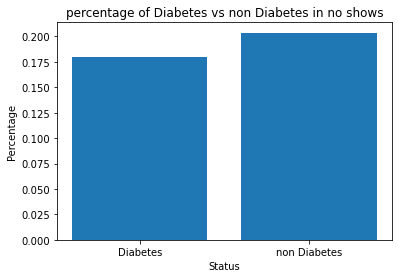

In [26]:
plot_by_percentage(df,'Diabetes') 

**people with Diabetes tends to attend the appointment we can't know why because we don't have enough data but maybe because their illness is serious**

Alcoholism percentage: 0.20148809523809524
non Alcoholism percentage: 0.20194649472318904


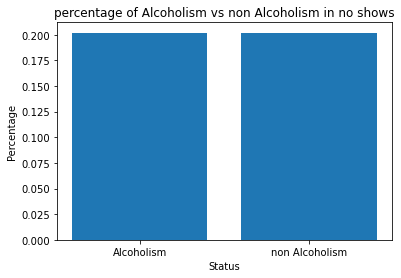

In [27]:
plot_by_percentage(df,'Alcoholism')

**patients without Alcoholism have the same no show percentage**

Handcap percentage: 0.1792360430950049
non Handcap percentage: 0.20235302809227415


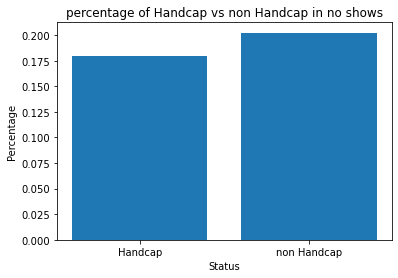

In [28]:
plot_by_percentage(df,'Handcap')

**people with Handcap tends to attend the appointment we can't know why because we don't have enough data but maybe because their illness is serious**

SMS_received percentage: 0.27574544839637
non SMS_received percentage: 0.16703311346525418


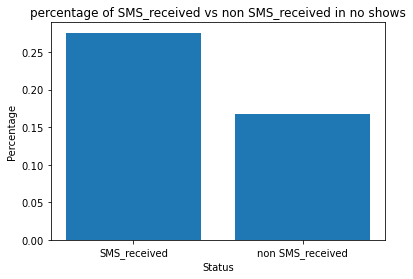

In [29]:
plot_by_percentage(df,'SMS_received')

**patients received sms have significantly higher no show percentage we can't know why because we don't have enough data but  maybe the doctor canceled the appointment**

male percentage: 0.19967947889471915
female percentage: 0.20314587973273943


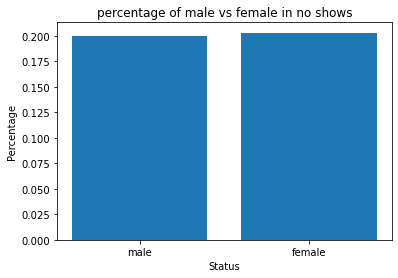

In [30]:
male = df[df['Gender'] == 'M']['No-show']
female = df[df['Gender'] == 'F']['No-show']

male_percentage = male[male == 1].count() / male.count()
female_percentage = female[female == 1].count() / female.count()

print('{} percentage: {}'.format('male', male_percentage))
print('{} percentage: {}'.format('female', female_percentage))
    
plt.bar(['{}'.format('male'), '{}'.format('female')],
        [male_percentage, female_percentage])
plt.title("percentage of {} vs {} in no shows".format('male','female'))
plt.xlabel("Status")
plt.ylabel("Percentage");

**both genders have the same no show percentage**

<a id='conclusions'></a>
## Conclusions

there is 22319 out of 110527 (20.2%) no show 

we can see that Neighborhoods that have a large number of no show also have a large number of attendance (positive correaltion)

the highest Neighbourhood in no show is `ILHAS OCEÂNICAS DE TRINDADE` but maybe there is missing data about this Neighbourhood
because all patients missed the appointment so we can say that `SANTOS DUMONT` is the highest<br>
we shouldn't build a hospital in any Neighbourhood with high no show percentage 

patients with scholarship have higher no show percentage maybe because they won't lose any money

patients without Hipertension, diabetes and Handcap have higher no show percentage Perhaps because their illness is not serious

patients received sms have significantly higher no show percentage Perhaps the doctor canceled the appointment or the patients don't want the appointment 

looks like that gender and alcoholism don't affect the no show percentage

### Limitations 
- we need more data especially about ILHAS OCEÂNICAS DE TRINDADE neighbourhood.
- this data is about Brazil only.
- we need more data to find the reason for no show